In [43]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

xdf1 = pd.read_excel('data/xdata1.xlsx')
xdf2 = pd.read_excel('data/xdata2.xlsx')
ydf1 = pd.read_excel('data/ydata1.xlsx')
ydf2 = pd.read_excel('data/ydata2.xlsx')

xts1 = xdf1['#data']
yts1 = ydf1['#data']
xts2 = xdf2['#data']
yts2 = ydf2['#data']

In [63]:
x = [] # train
y = [] # test (answer)
for i in range(0, 960):
        tmpX = []
        for j in range(0, 10):
            tmpX.append(xts2[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts2[10+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(10, 1)))
m.add(RepeatVector(1)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

In [49]:

#20データを最小二乗法で評価
for i in range(0,20):
    input = np.array(xts2[i:i+10]) 
    input = input.reshape((1,10,1))
    yhat = m.predict(input)
    print(yhat,yts2[i+10])

[[[0.03909748]]] 0.041049365
[[[0.04954552]]] 0.051595199
[[[0.06111551]]] 0.063197711
[[[0.07381655]]] 0.075861883
[[[0.08767948]]] 0.089604025
[[[0.10266314]]] 0.10443983
[[[0.11874124]]] 0.1203767
[[[0.13597101]]] 0.13741078
[[[0.15413469]]] 0.15552765
[[[0.17329012]]] 0.17470478
[[[0.19351749]]] 0.19491435
[[[0.21475272]]] 0.21612515
[[[0.23706429]]] 0.23830345
[[[0.26037943]]] 0.26141266
[[[0.28477117]]] 0.28541233
[[[0.31011486]]] 0.31025692
[[[0.33614594]]] 0.33589458
[[[0.36249596]]] 0.3622662
[[[0.38962212]]] 0.38930482
[[[0.41701975]]] 0.41693515


ValueError: x and y must have same first dimension, but have shapes (100,) and (1, 1, 1, 1)

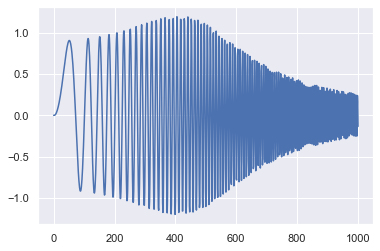

In [66]:
# データ60番～83番から、次の一年(84番～95番)を予測
for i in range(0,100):
    input = np.array(xts2[i:i+10]) 
    input = input.reshape((1,10,1))
    yhat = m.predict(input)
    predict = []
    predict.append(yhat)
    plt.plot(yts2)
    xdata = np.arange(0, 100, 1)
    plt.plot(xdata, predict, 'r')

In [8]:
#15データ
x = [] # train
y = [] # test (answer)
for i in range(0, 900):
        tmpX = []
        for j in range(0, 15):
            tmpX.append(xts2[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts2[15+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(15, 1)))
m.add(RepeatVector(1)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,20):
    input = np.array(xts2[i:i+15]) 
    input = input.reshape((1,15,1))
    yhat = m.predict(input)
    s=(yts2[i+15]) ** 2 - (yhat) ** 2
    t = +s
    
e=t/20
print(e)

[[[5.8680773e-05]]]


In [12]:
#20データ
x = [] # train
y = [] # test (answer)
for i in range(0, 840):
        tmpX = []
        for j in range(0, 20):
            tmpX.append(xts2[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts2[20+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(20, 1)))
m.add(RepeatVector(1)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,20):
    input = np.array(xts2[i:i+20]) 
    input = input.reshape((1,20,1))
    yhat = m.predict(input)
    s=(yts2[i+20]) ** 2 - (yhat) ** 2
    t = +s
    
e=t/20
print(e)


[[[0.00014749]]]


In [13]:
#25データ
x = [] # train
y = [] # test (answer)
for i in range(0, 750):
        tmpX = []
        for j in range(0, 25):
            tmpX.append(xts2[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts2[25+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(25, 1)))
m.add(RepeatVector(1)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,25):
    input = np.array(xts2[i:i+25]) 
    input = input.reshape((1,25,1))
    yhat = m.predict(input)
    s=(yts2[i+25]) ** 2 - (yhat) ** 2
    t = +s
    
e=t/20
print(e)


[[[3.6892296e-05]]]


In [27]:
#30データ
x = [] # train
y = [] # test (answer)
for i in range(0, 960):
        tmpX = []
        for j in range(0, 30):
            tmpX.append(xts2[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts2[30+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(30, 1)))
m.add(RepeatVector(1)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,30):
    input = np.array(xts2[i:i+30]) 
    input = input.reshape((1,30,1))
    yhat = m.predict(input)
    s=(yts2[i+15]) ** 2 - (yhat) ** 2
    t = +s
    
e=t/20
print(e)


[[[-0.00716124]]]


In [15]:
#1データ
x = [] # train
y = [] # test (answer)
for i in range(0, 990):
        tmpX = []
        for j in range(0, 1):
            tmpX.append(xts2[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts2[1+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(1,1)))
m.add(RepeatVector(1)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,1):
    input = np.array(xts2[i:i+1])
    input = input.reshape((1,1,1))
    yhat = m.predict(input)
    s=(yts2[i+15]) ** 2 - (yhat) ** 2
    t = +s
    
e=t/20
print(e)


[[[0.00024868]]]


In [16]:
#5データ
x = [] # train
y = [] # test (answer)
for i in range(0, 900):
        tmpX = []
        for j in range(0, 5):
            tmpX.append(xts2[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,1):
            tmpY.append(yts2[5+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(5, 1)))
m.add(RepeatVector(1)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

for i in range(0,5):
    input = np.array(xts2[i:i+5]) 
    input = input.reshape((1,5,1))
    yhat = m.predict(input)
    s=(yts2[i+15]) ** 2 - (yhat) ** 2
    t =+s
    
e=t/20
print(e)


[[[0.00148304]]]


In [40]:
x = [] # train
y = [] # test (answer)
for i in range(0, 880):
        tmpX = []
        for j in range(0, 10):
            tmpX.append(xts2[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,3):
            tmpY.append(yts2[10+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(10, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

#20データを最小二乗法で評価
for i in range(0,20):
    input = np.array(xts2[i:i+10]) 
    input = input.reshape((1,10,1))
    yhat = m.predict(input)
    s=(yts2[i+10]) ** 2 - (yhat) ** 2
    t = +s
    
e=t/20
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)

-0.0007205824367702007


In [4]:
#50データ
x = [] # train
y = [] # test (answer)
for i in range(0, 900):
        tmpX = []
        for j in range(0, 50):
            tmpX.append(xts2[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,3):
            tmpY.append(yts2[50+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(50, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

#３層のデータを最小二乗法で評価
for i in range(0,20):
    input = np.array(xts2[i:i+50]) 
    input = input.reshape((1,50,1))
    yhat = m.predict(input)
    s=(yts2[i+50]) ** 2 - (yhat) ** 2
    t = +s
    
e=t/20
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)

[[[0.00154774]]]


In [8]:
#100データ
x = [] # train
y = [] # test (answer)
for i in range(0, 830):
        tmpX = []
        for j in range(0, 100):
            tmpX.append(xts2[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,3):
            tmpY.append(yts2[100+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(100, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)


#３層のデータを最小二乗法で評価
#50データを読み込み、3データを算出。それを２０回繰り返す。
for i in range(0,20):
    input = np.array(xts2[i:i+100]) 
    input = input.reshape((1,100,1))
    yhat = m.predict(input)
    s=(yts2[i+100]) ** 2 - (yhat) ** 2
    t = +s
    
e=t/20
print(e)

[[[0.0058241 ]
  [0.00956999]
  [0.01130747]]]


In [16]:
#20データ
x = [] # train
y = [] # test (answer)
for i in range(0, 720):
        tmpX = []
        for j in range(0, 200):
            tmpX.append(xts2[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,3):
            tmpY.append(yts2[200+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(200, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)




In [18]:
#３層のデータを最小二乗法で評価
#50データを読み込み、3データを算出。それを２０回繰り返す。
for i in range(0,20):
    input = np.array(xts2[i:i+200]) 
    input = input.reshape((1,200,1))
    yhat = m.predict(input)
    s=(yts2[i+200]) ** 2 - (yhat) ** 2
    t = +s
    
e=t/20
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)

0.0026697665452957153


In [25]:
#1データ
x = [] # train
y = [] # test (answer)
for i in range(0, 992):
        tmpX = []
        for j in range(0, 1):
            tmpX.append(xts2[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,3):
            tmpY.append(yts2[1+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(1,1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)



In [32]:
for i in range(0,20):
    input = np.array(xts2[i:i+1]) 
    input = input.reshape((1,1,1))
    yhat = m.predict(input)
    print(yhat,yts2[i+1:i+4])
    s=(yts2[i+1]) ** 2 - (yhat) ** 2
    t=+s
        
e=t/20
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)

[[[-0.07574586]
  [-0.09235688]
  [-0.09543943]]] 1    0.000019
2    0.000249
3    0.001065
Name: #data, dtype: float64
[[[-0.07551074]
  [-0.09205824]
  [-0.09513001]]] 2    0.000249
3    0.001065
4    0.002852
Name: #data, dtype: float64
[[[-0.07480531]
  [-0.09116226]
  [-0.09420175]]] 3    0.001065
4    0.002852
5    0.005889
Name: #data, dtype: float64
[[[-0.07362962]
  [-0.08966901]
  [-0.09265471]]] 4    0.002852
5    0.005889
6    0.010309
Name: #data, dtype: float64
[[[-0.07198365]
  [-0.08757856]
  [-0.09048893]]] 5    0.005889
6    0.010309
7    0.016117
Name: #data, dtype: float64
[[[-0.06990554]
  [-0.08493776]
  [-0.08775154]]] 6    0.010309
7    0.016117
8    0.023241
Name: #data, dtype: float64
[[[-0.06735619]
  [-0.08169734]
  [-0.08439236]]] 7    0.016117
8    0.023241
9    0.031580
Name: #data, dtype: float64
[[[-0.06423105]
  [-0.07772065]
  [-0.08027054]]] 8     0.023241
9     0.031580
10    0.041049
Name: #data, dtype: float64
[[[-0.06062624]
  [-0.07313401]
  [-0

In [47]:
#5データ
x = [] # train
y = [] # test (answer)
for i in range(0, 900):
        tmpX = []
        for j in range(0, 5):
            tmpX.append(xts2[i+j])
        x.append(tmpX)
            
        tmpY = []
        for j in range(0,3):
            tmpY.append(yts2[5+j+i])
        y.append(tmpY)
    

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(5, 1)))
m.add(RepeatVector(3)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)



KeyboardInterrupt: 

In [36]:
for i in range(0,5):
    input = np.array(xts2[i:i+5]) 
    input = input.reshape((1,5,1))
    yhat = m.predict(input)
    s=(yts2[i+5]) ** 2 - (yhat) ** 2
    t =+s
    
e=t/20
e = (e[0,0]+e[0,1]+e[0,2])
e = e[0]/3
print(e)


-4.117693849063168e-05


In [46]:
for i in range(0,20):
    input = np.array(xts2[i:i+5])
    input = input.reshape((1,5,1))
    yhat = m.predict(input)
    print(yhat,yts2[i+5,i+8])

KeyError: 'key of type tuple not found and not a MultiIndex'